# Load Libraries

In [1]:
import numpy as np 
import glob
import scipy.stats as st 
from datetime import date
from datetime import datetime
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import gsw
import cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import signal
import similaritymeasures
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset as netcdf
import time


# Load local routines

In [2]:
import mvp_routines as mvp

# Input from the user

In [39]:
Yorig = 1950

# Input MVP data directory and profile name (should contains all .m1 and .log files for the section)

profile_name = 'Stationary Profiling/Bathy 0'
mvpdir       = '../MVP300_DATA/' +profile_name + '/'


# Re-arange profiles into matrices

In [ ]:
# Loop on MVP .m1 and log files in the directory

list_offiles = sorted(filter(os.path.isfile,\
                           glob.glob(mvpdir + '*.raw')))

print('Found ' + str(len(list_offiles)) + ' MVP files in the directory: ' + mvpdir)

PRES_temp = []
TEMP_temp = []
COND_temp = []
SOUNDVEL_temp = []
DO_temp = []
TEMP2_temp = [] # temp from DO sensor
SUNA_temp = []
FLUO_temp = [] 
TURB_temp = []
PH_temp = [] 
DIR = []
for mvp_dat_name in list_offiles[0:]:

    mvp_log_name=mvp_dat_name[:-4]+'.log'

    # mvp_log_name=mvpdir+'MVP_'+mvp_dat_name[-20:-3]+'.log'

    # Get start and end time of the cycle

    (mvp_tstart,mvp_tend,cycle_dur) = mvp.get_log(mvp_log_name,Yorig)
    if cycle_dur>1:

        # Read one cycle MVP data  TO CODE
        (pres,soundvel,cond,temp,do_raw,temp2_raw,suna_raw,fluo_raw,turb_raw,ph_raw) = mvp.readcycle_raw(mvp_dat_name)
        (pres,soundvel,cond,temp,do,temp2,suna,fluo,turb,ph) = mvp.raw_data_conversion(pres,soundvel,cond,temp,do_raw,temp2_raw,suna_raw,fluo_raw,turb_raw,ph_raw)
        
        if np.nanmax(pres)-np.nanmin(pres)>2:

            # Allocate time to samples and select the ascending part 
            (pres_up,soundvel_up,cond_up,temp_up,do_up,temp2_up,suna_up,fluo_up,turb_up,ph_up) = mvp.timecycle_up_bgc(pres,soundvel,cond,temp,do,temp2,suna,fluo,turb,ph,mvp_tstart,mvp_tend)
            (pres_down,soundvel_down,cond_down,temp_down,do_down,temp2_down,suna_down,fluo_down,turb_down,ph_down) = mvp.timecycle_down_bgc(pres,soundvel,cond,temp,do,temp2,suna,fluo,turb,ph,mvp_tstart,mvp_tend)


            if len(pres_down)>0:
                if np.nanmax(pres_down)-np.nanmin(pres_down)>2:
                    PRES_temp.append(pres_down)
                    SOUNDVEL_temp.append(soundvel_down)
                    COND_temp.append(cond_down)
                    TEMP_temp.append(temp_down)
                    DO_temp.append(do_down)
                    TEMP2_temp.append(temp2_down)
                    SUNA_temp.append(suna_down)
                    FLUO_temp.append(fluo_down)
                    TURB_temp.append(turb_down)
                    PH_temp.append(ph_down)

                    DIR.append('down')

                    
            if len(pres_up)>0:
                if np.nanmax(pres_up)-np.nanmin(pres_up)>2:
                    PRES_temp.append(pres_up)
                    SOUNDVEL_temp.append(soundvel_up)
                    COND_temp.append(cond_up)
                    TEMP_temp.append(temp_up)
                    DO_temp.append(do_up)
                    TEMP2_temp.append(temp2_up)
                    SUNA_temp.append(suna_up)
                    FLUO_temp.append(fluo_up)
                    TURB_temp.append(turb_up)
                    PH_temp.append(ph_up)
                    DIR.append('up')

            
            

# Re-arange files into matrices
M_size = 0
for i in range(len(PRES_temp)):
    M_size = max(M_size, len(PRES_temp[i]))
    
PRES = np.zeros(( len(PRES_temp), M_size))
SOUNDVEL = np.zeros(( len(PRES_temp), M_size))
COND = np.zeros(( len(PRES_temp), M_size))
TEMP = np.zeros(( len(PRES_temp), M_size))
DO = np.zeros(( len(PRES_temp), M_size))
TEMP2 = np.zeros(( len(PRES_temp), M_size))
SUNA = np.zeros(( len(PRES_temp), M_size))
FLUO = np.zeros(( len(PRES_temp), M_size))
TURB = np.zeros(( len(PRES_temp), M_size))
PH = np.zeros(( len(PRES_temp), M_size))
PRES[:] = np.nan
SOUNDVEL[:] = np.nan
DO[:] = np.nan
TEMP2[:] = np.nan
SUNA[:] = np.nan
FLUO[:] = np.nan
TURB[:] = np.nan
PH[:] = np.nan

del M_size

for i in range(len(PRES_temp)):
    PRES[i,0:len(PRES_temp[i])] = PRES_temp[i]
    SOUNDVEL[i,0:len(SOUNDVEL_temp[i])] = SOUNDVEL_temp[i]
    COND[i,0:len(COND_temp[i])] = COND_temp[i]
    TEMP[i,0:len(TEMP_temp[i])] = TEMP_temp[i]
    DO[i,0:len(DO_temp[i])] = DO_temp[i]
    TEMP2[i,0:len(TEMP2_temp[i])] = TEMP2_temp[i]
    SUNA[i,0:len(SUNA_temp[i])] = SUNA_temp[i]
    FLUO[i,0:len(FLUO_temp[i])] = FLUO_temp[i]
    TURB[i,0:len(TURB_temp[i])] = TURB_temp[i]
    PH[i,0:len(PH_temp[i])] = PH_temp[i]
del PRES_temp, SOUNDVEL_temp, DO_temp, TEMP2_temp, SUNA_temp, FLUO_temp, TURB_temp, PH_temp, COND_temp, TEMP_temp

Found 1 MVP files in the directory: ../MVP300_DATA/Stationary Profiling/Bathy 0/


# Plot profiles

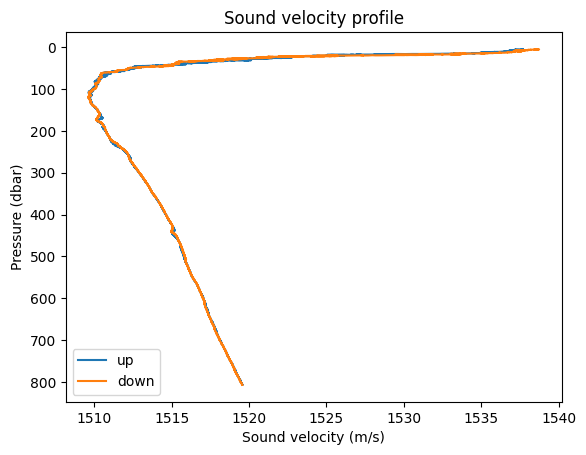

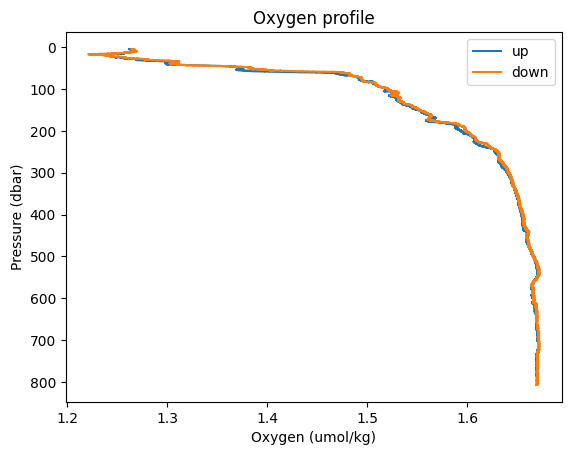

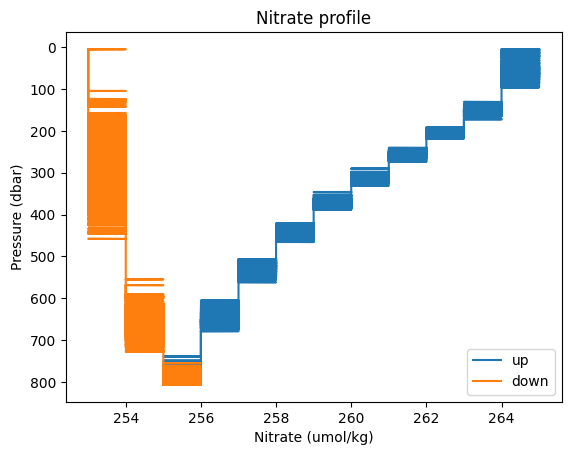

In [41]:
i = 0

plt.figure(1)
plt.plot(SOUNDVEL[i],PRES[i],label='up')
plt.plot(SOUNDVEL[i+1],PRES[i+1],label='down')
plt.gca().invert_yaxis()
plt.title('Sound velocity profile')
plt.xlabel('Sound velocity (m/s)')
plt.ylabel('Pressure (dbar)')
plt.legend()

plt.figure(2)
plt.plot(DO[i],PRES[i],label='up')
plt.plot(DO[i+1],PRES[i+1],label='down')
plt.gca().invert_yaxis()
plt.title('Oxygen profile')
plt.xlabel('Oxygen (umol/kg)')
plt.ylabel('Pressure (dbar)')
plt.legend()

plt.figure(3)
plt.plot(SUNA[i],PRES[i],label='up')
plt.plot(SUNA[i+1],PRES[i+1],label='down')
plt.gca().invert_yaxis()
plt.title('Nitrate profile')
plt.xlabel('Nitrate (umol/kg)')
plt.ylabel('Pressure (dbar)')
plt.legend()



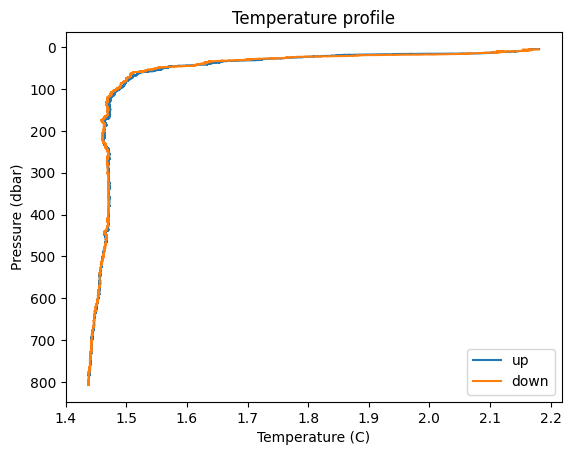

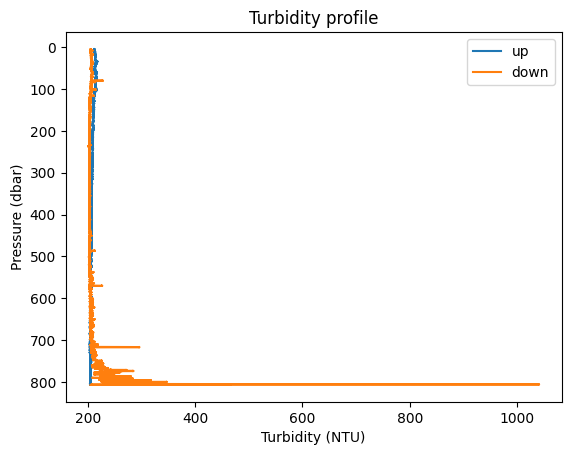

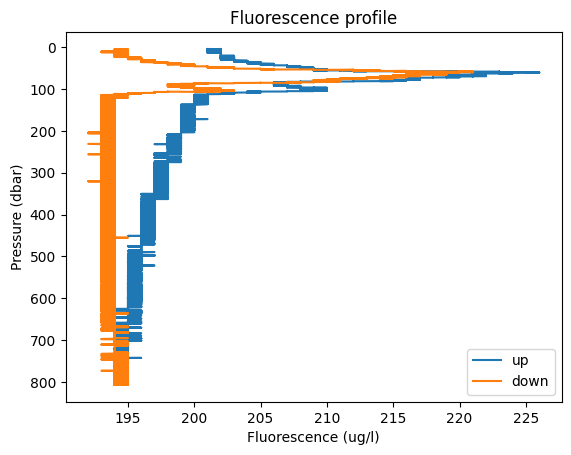

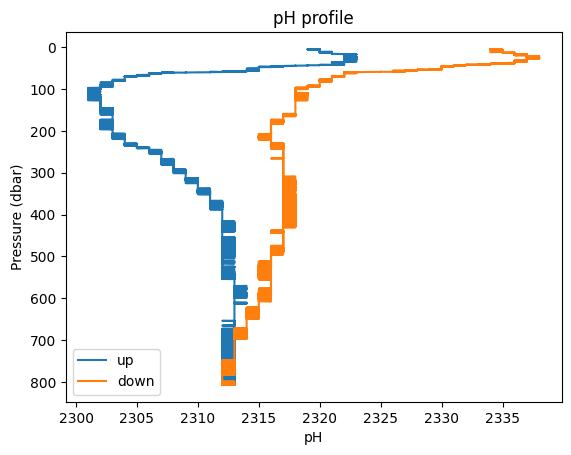

In [42]:
plt.figure(1)
plt.plot(TEMP2[i],PRES[i],label='up')
plt.plot(TEMP2[i+1],PRES[i+1],label='down')
plt.gca().invert_yaxis()
plt.title('Temperature profile')
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (dbar)')
plt.legend()

plt.figure(2)
plt.plot(TURB[i],PRES[i],label='up')
plt.plot(TURB[i+1],PRES[i+1],label='down')
plt.gca().invert_yaxis()
plt.title('Turbidity profile')
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Pressure (dbar)')
plt.legend()

plt.figure(3)
plt.plot(FLUO[i],PRES[i],label='up')
plt.plot(FLUO[i+1],PRES[i+1],label='down')
plt.gca().invert_yaxis()
plt.title('Fluorescence profile')
plt.xlabel('Fluorescence (ug/l)')
plt.ylabel('Pressure (dbar)')
plt.legend()

plt.figure(4)
plt.plot(PH[i],PRES[i],label='up')
plt.plot(PH[i+1],PRES[i+1],label='down')
plt.gca().invert_yaxis()
plt.title('pH profile')
plt.xlabel('pH')
plt.ylabel('Pressure (dbar)')
plt.legend()


